<a href="https://colab.research.google.com/github/castudil/som-lstm/blob/main/som_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load all the CSV files form URL and merge into a single dataframe

In [38]:
path = 'https://raw.githubusercontent.com/castudil/som-lstm/main/data/' # use your path
cities = ['chillan','curico','linares','los_angeles','osorno','puerto_montt','rancagua','san_fernando','talca'];
li = []
for i in cities:
  filename=path+i+'.csv'
  print('loading: '+filename)
  df = pd.read_csv(filename, index_col=None, header=0)
  # Convert the date column to a datestamp type
  df['date'] = pd.to_datetime(df['date'])
  # Set the date column as the index of your DataFrame meat
  df['city']=i
  df = df.set_index('date')
  #print(df.head(5))
  li.append(df)
  
print('consolidating into a single data frame.')
frame = pd.concat(li, axis=0, ignore_index=False)
print('displaying a random sample.')
print(frame.sample(n = 15))
print(frame.describe())
#print(frame['date'].dt.date.min()+ ' to '+ frame['date'].dt.date.max())
print(frame.index.min())
print(frame.index.max())


loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/chillan.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/curico.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/linares.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/los_angeles.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/osorno.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/puerto_montt.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/rancagua.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/san_fernando.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/talca.csv
consolidating into a single data frame.
displaying a random sample.
                         PM25          city
date                                       
2016-01-19 20:00:00   7.98600         talca
2016-02-21 14:00:00  11.16000       linare

 

1.   The data considers nine different cities
2.   The data contains ~40K data rows
3.   No missing data
4.   PM2.5 information
5.   Data ranges from the year 2016 to 2020 









Plot the time series for one of the cities

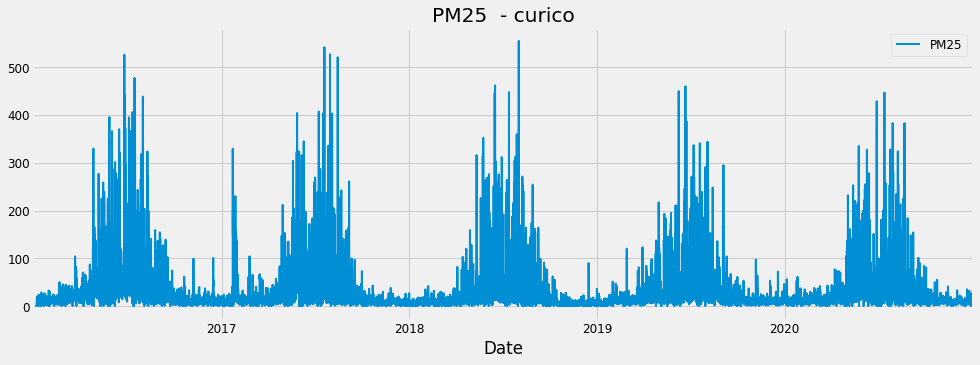

In [55]:
def plot_city(city='curico'):
  plt.rcParams['figure.figsize'] = (15, 5)
  plt.style.use('fivethirtyeight')

  df=frame.loc[frame['city'] == city] # Sleecting Data for Curico

  # Plot time series dataset
  ax = df.plot(linewidth=2, fontsize=12);

  # Additional customizations
  ax.set_xlabel('Date');
  ax.set_title('PM25  - ' + city)
  ax.legend(fontsize=12);
  plt.show()

plot_city('curico')

1.   Most of the peaks occur in winter, these PM25 saturation obbey to a stational nature
2.   An exception occurs in the summer of 2017, perhaps attributed to fire forest. This information is corroborated from the [newspapers](https://ambiental.net/2017/02/el-incendio-mas-destructivo-en-la-historia-reciente-de-chile/ ), mentioning that fires as one of the most devasting of the recent years and affecting the center-south of Chile.
3. we corroborate the lalter situation by analyzing the case of 2017 in nearby cities

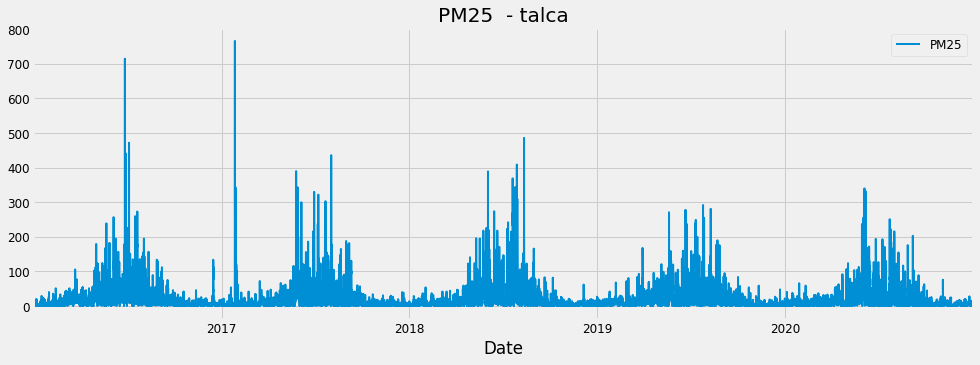

In [54]:
plot_city('talca')

from the plot it is possible to see that the anomality was also captured in the same period of time.